In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime 

In [21]:
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [23]:
# Check for missing values
df.isnull().sum()


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [25]:
# Remove leading/trailing whitespace from 'date_added'
df['date_added'] = df['date_added'].str.strip()

# Convert to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Extract year and month from 'date_added'
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

# Fill or drop null values (optional step)
df['country'] = df['country'].fillna('Unknown')
df['rating'] = df['rating'].fillna('Not Rated')


Titles Added Per Year

In [ ]:
# Count how many titles were added each year
yearly_counts = df['year_added'].value_counts().sort_index()

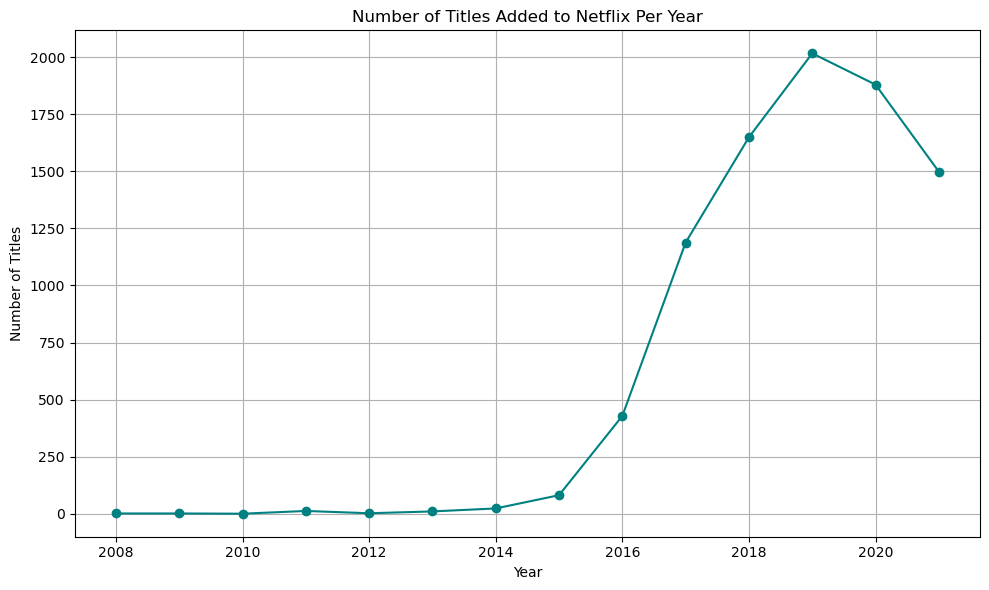

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(yearly_counts.index, yearly_counts.values, marker='o', color='teal')
plt.title('Number of Titles Added to Netflix Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.tight_layout()
plt.show()

Movies vs TV Shows Added Per Year

In [28]:
# Group by both type and year
type_year = df.groupby(['year_added', 'type']).size().unstack()


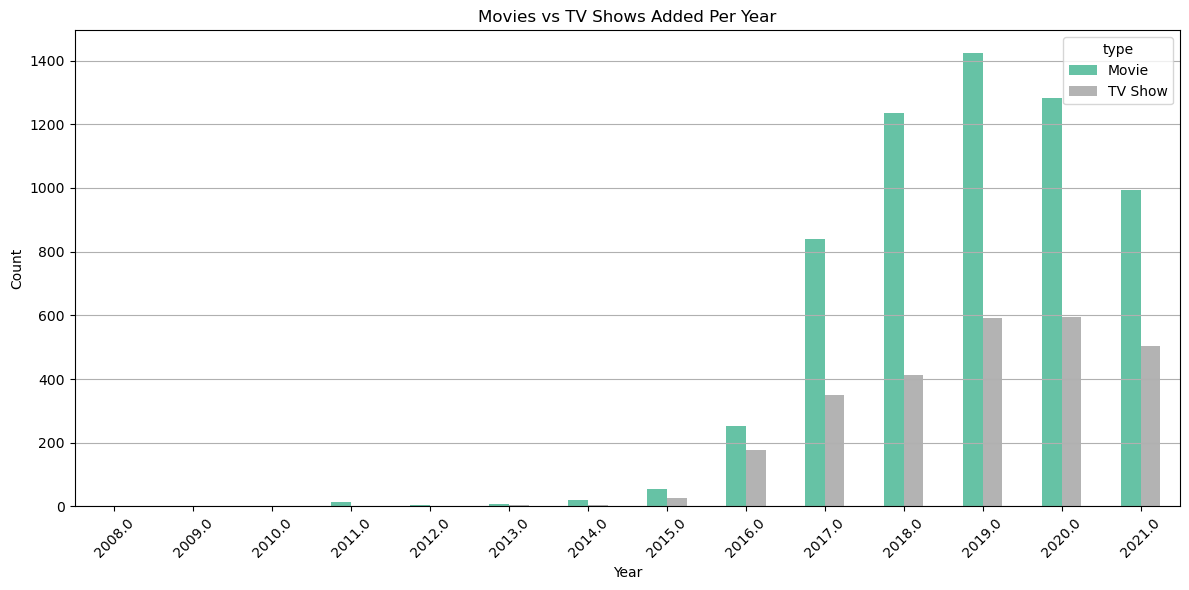

In [29]:
# Plot the grouped bar chart
type_year.plot(kind='bar', stacked=False, figsize=(12, 6), colormap='Set2')
plt.title('Movies vs TV Shows Added Per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Titles Added Per Month (Aggregated Across Years)

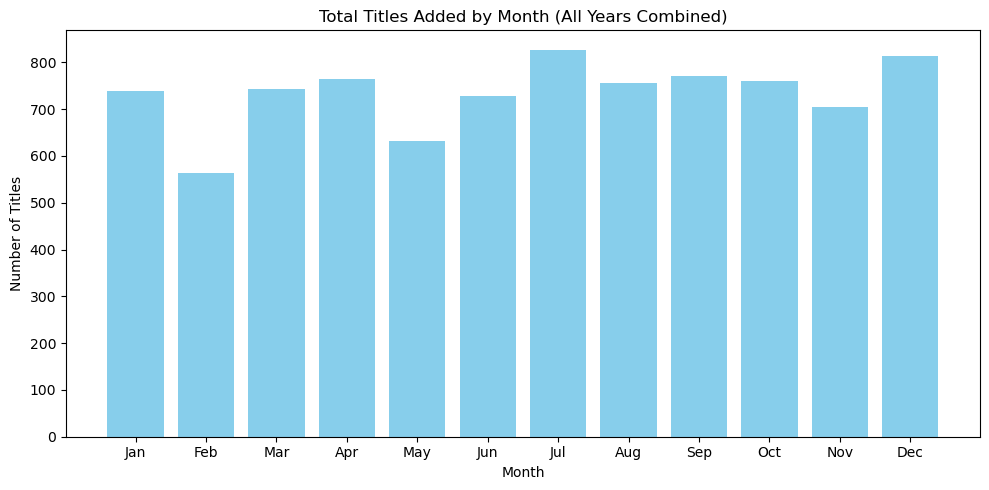

In [30]:
# Count how many titles were added in each calendar month
monthly_counts = df['month_added'].value_counts().sort_index()

# Month labels
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.figure(figsize=(10, 5))
plt.bar(months, monthly_counts, color='skyblue')
plt.title('Total Titles Added by Month (All Years Combined)')
plt.xlabel('Month')
plt.ylabel('Number of Titles')
plt.tight_layout()
plt.show()


Top 10 Genre

In [31]:
# Create 'main_genre' from the first genre in 'listed_in'
df['main_genre'] = df['listed_in'].str.split(',').str[0]


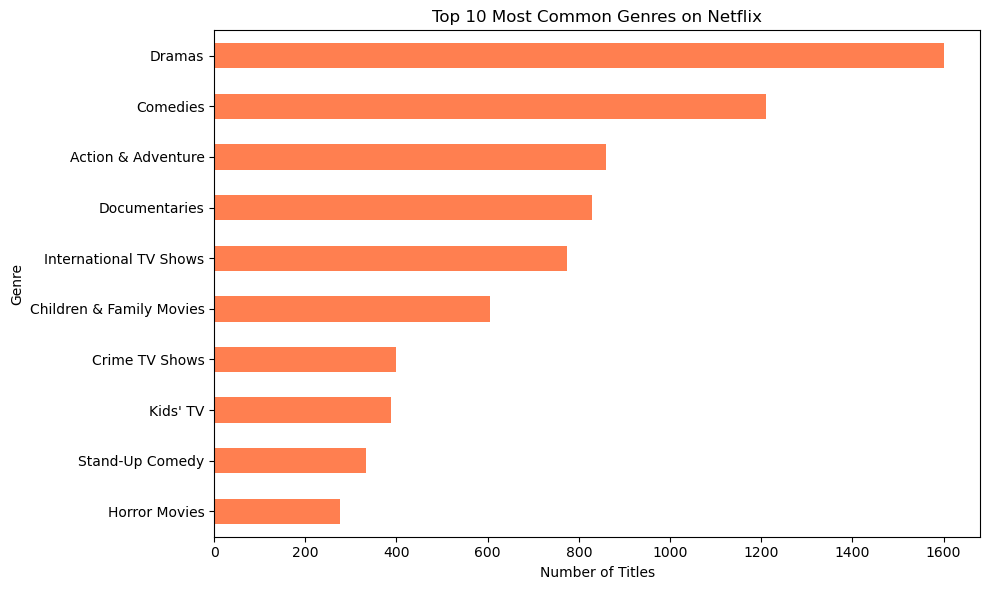

In [32]:
import matplotlib.pyplot as plt

# Count the top 10 genres
top_genres = df['main_genre'].value_counts().head(10)

# Plot
plt.figure(figsize=(10, 6))
top_genres.plot(kind='barh', color='coral')
plt.title('Top 10 Most Common Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.gca().invert_yaxis()  # Show the highest on top
plt.tight_layout()
plt.show()


Top 10 country produing content

In [33]:
# Drop rows where country is missing
country_split = df['country'].dropna().str.split(',')

In [34]:
# Flatten and clean the country list
from collections import Counter

all_countries = [country.strip() for sublist in country_split for country in sublist]
top_10_countries = Counter(all_countries).most_common(10)

In [35]:
# Convert to DataFrame for plotting
country_df = pd.DataFrame(top_10_countries, columns=['Country', 'Count'])

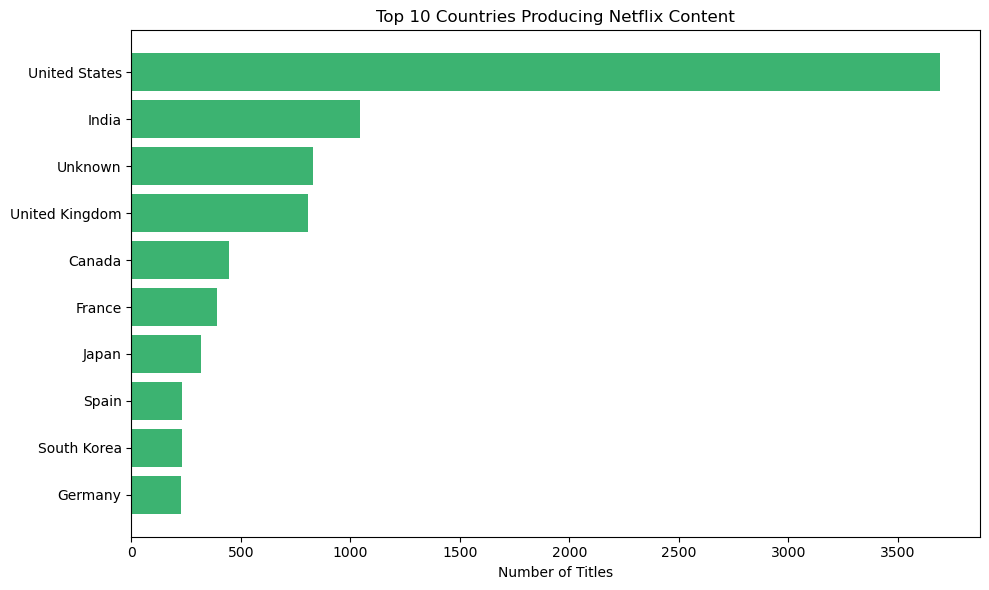

In [36]:
plt.figure(figsize=(10, 6))
plt.barh(country_df['Country'], country_df['Count'], color='mediumseagreen')
plt.title('Top 10 Countries Producing Netflix Content')
plt.xlabel('Number of Titles')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Content from Top Countries Over the Years

In [37]:
# Keep only the first country for simplicity
df['main_country'] = df['country'].str.split(',').str[0].str.strip()

# Get top 5 countries by frequency
top_countries = df['main_country'].value_counts().head(5).index.tolist()

In [38]:
# Filter dataset
df_top_countries = df[df['main_country'].isin(top_countries)]

In [39]:
# Group by year and country
country_year = df_top_countries.groupby(['year_added', 'main_country']).size().unstack().fillna(0)


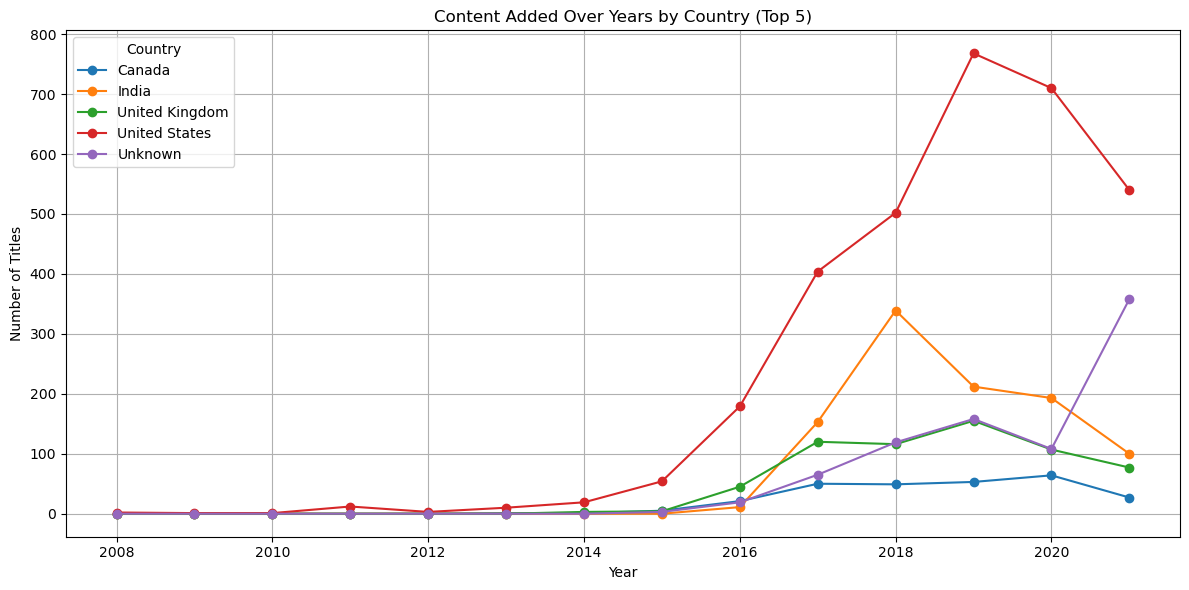

In [40]:
country_year.plot(kind='line', figsize=(12, 6), marker='o')
plt.title('Content Added Over Years by Country (Top 5)')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.legend(title='Country')
plt.grid(True)
plt.tight_layout()
plt.show()

Count of Movies vs TV Shows (Pie Chart)

In [47]:
# Count number of Movies and TV Shows
type_counts = df['type'].value_counts()
print(type_counts)

type
Movie      6131
TV Show    2676
Name: count, dtype: int64


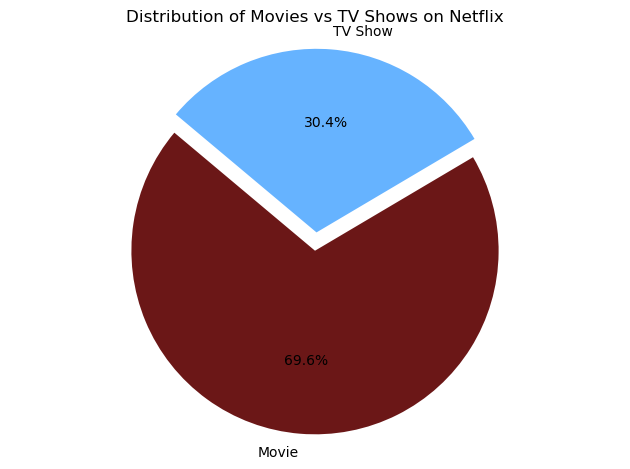

In [44]:
plt.figure()
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', 
        startangle=140, colors=["#6B1717",'#66b3ff'], explode=(0.05, 0.05))
plt.title('Distribution of Movies vs TV Shows on Netflix')
plt.axis('equal')  # Equal aspect ratio ensures pie is circular
plt.tight_layout()
plt.show()

 Movie Duration Distribution (Histogram)

In [48]:
movies = df[df['type'] == 'Movie'].copy()

In [50]:
# Extract duration in minutes
movies['duration_minutes'] = movies['duration'].str.extract('(\d+)').astype(float)
movies['duration_minutes'].head()

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Ayush Malik\AppData\Local\Temp\ipykernel_20304\1860021419.py:2: SyntaxWarning: invalid escape sequence '\d'
  movies['duration_minutes'] = movies['duration'].str.extract('(\d+)').astype(float)


0      90.0
6      91.0
7     125.0
9     104.0
12    127.0
Name: duration_minutes, dtype: float64

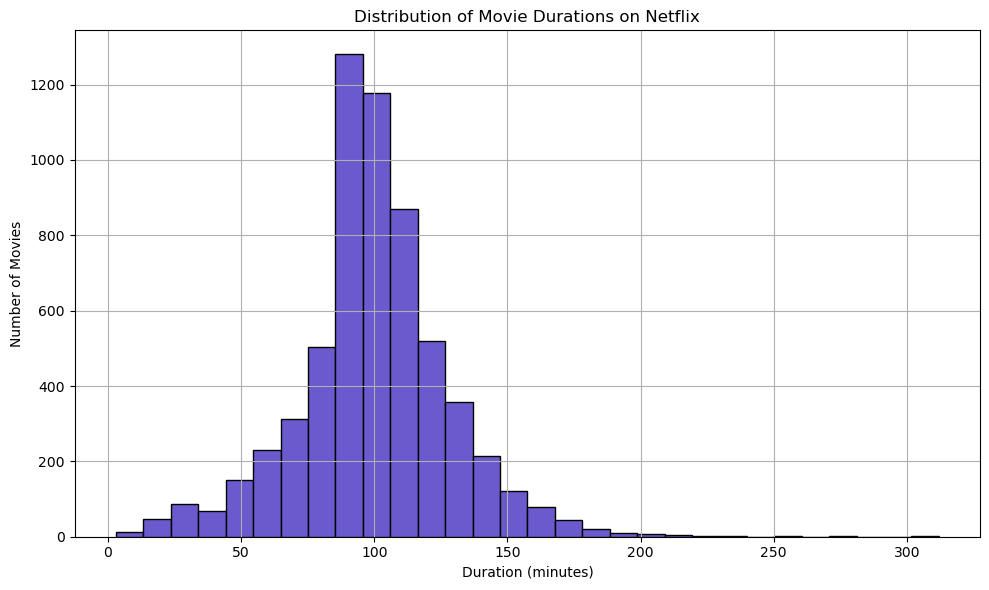

In [51]:
# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(movies['duration_minutes'].dropna(), bins=30, color='slateblue', edgecolor='black')
plt.title('Distribution of Movie Durations on Netflix')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.tight_layout()
plt.show()

Count of Shows/Movies by Rating

In [52]:
# Count of each rating
rating_counts = df['rating'].value_counts().head(10)  # Top 10 ratings

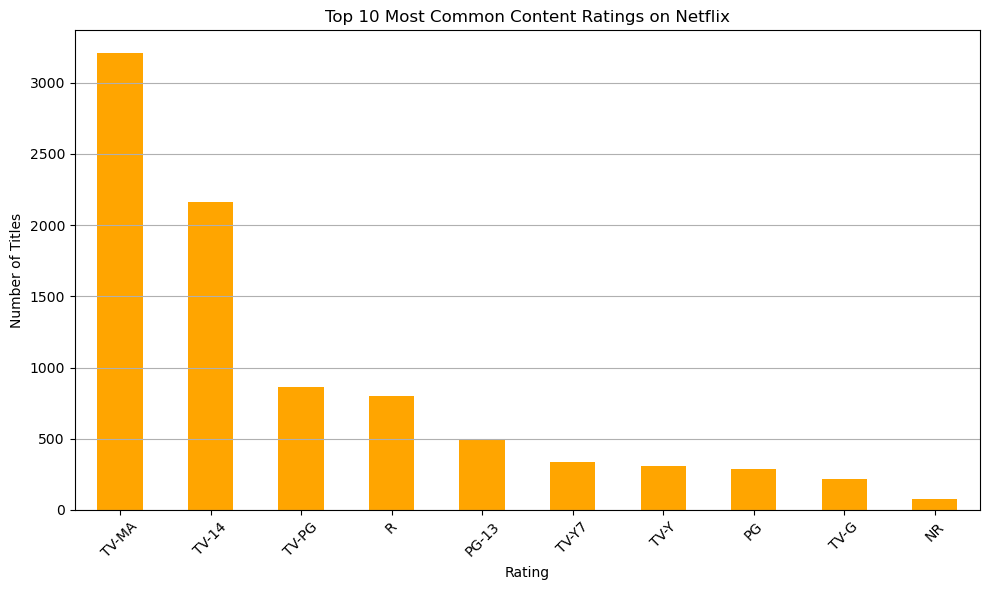

In [53]:
plt.figure(figsize=(10, 6))
rating_counts.plot(kind='bar', color='orange')
plt.title('Top 10 Most Common Content Ratings on Netflix')
plt.xlabel('Rating')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Trend of Rating Types Over the Years

In [54]:
df_rated = df[df['year_added'].notna() & df['rating'].notna()]
df_rated['year_added'] = df_rated['year_added'].astype(int)

C:\Users\Ayush Malik\AppData\Local\Temp\ipykernel_20304\3145141015.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rated['year_added'] = df_rated['year_added'].astype(int)


In [55]:
top_ratings = df_rated['rating'].value_counts().head(5).index.tolist()
df_rated = df_rated[df_rated['rating'].isin(top_ratings)]

In [56]:
rating_trend = df_rated.groupby(['year_added', 'rating']).size().unstack().fillna(0)

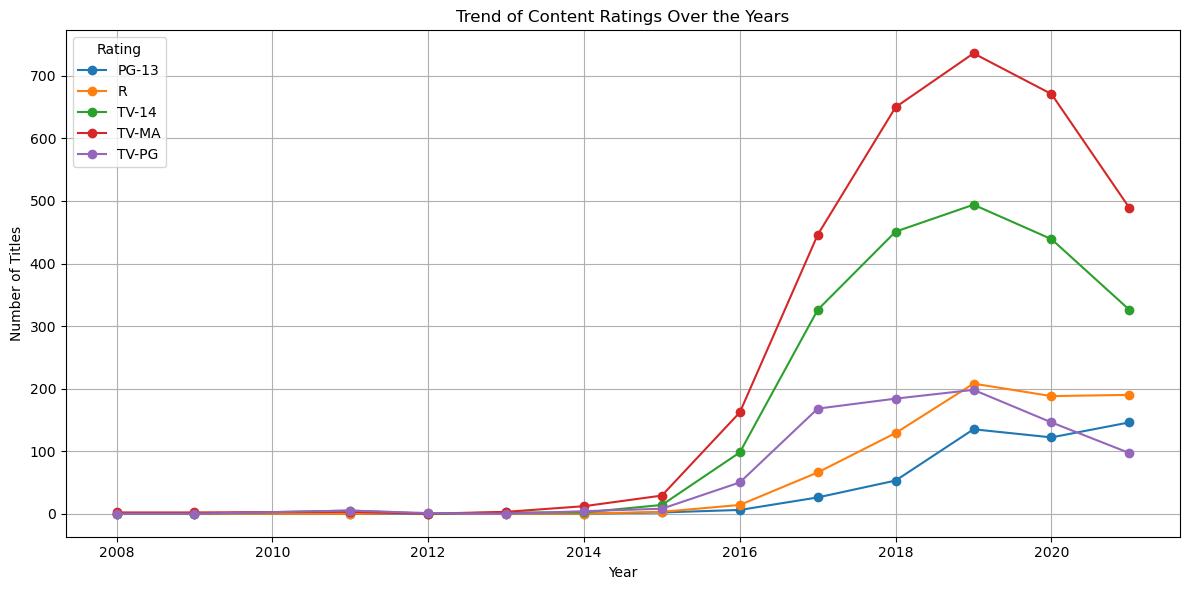

In [57]:
rating_trend.plot(figsize=(12, 6), marker='o')
plt.title('Trend of Content Ratings Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.legend(title='Rating')
plt.grid(True)
plt.tight_layout()
plt.show()